In [3]:
# carga de datos
import pandas as pd
import io
from google.colab import files

# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks

#Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_actores = pd.read_excel("Actores_Sociales.xlsx")
data_actores

,CODIGO ÚNICO,Nombre del Aliado,Tipo,Red 1,Familia,Status,Fecha del Status,Área Social,Proyectos anteriores con UeR,Cant Beneficiarios,Descripción de Organización,Pagina web,Instagram,Facebook,Twitter,ODS,Beneficiarios,Pais
0,2,AID FOR AIDS,Fundación,Unidos en Red,NaN,Activa,NaN,Salud,NaN,1164330,Es una organización sin fines de lucro comprom...,https://aidforaids.org/?lang=es,https://www.instagram.com/aidforaids/,https://www.facebook.com/aidforaids,https://twitter.com/AIDFORAIDSINTL,3.0,mixto,PANAMA
1,4,ALEJANDRO SANZ,Personalidad,La Fuerza del Corazón,NaN,Activa,NaN,Derechos Humanos,NaN,NaN,Sanz ha sido reconocido por su implicación dir...,www.alejandrosanz.com,alejandrosanz,Asanzoficial,@alejandrsanz,1.0,mixto,NaN
2,6,AMÉRICA SOLIDARIA,Fundación,Unidos en Red,NaN,Inactiva,NaN,Salud,Usuario Blackboard,33,ONG que construye redes entre los países de la...,http://americasolidaria.org/,https://www.instagram.com/americasolidaria/,https://www.facebook.com/americasolidaria,https://twitter.com/americasolidari,1.0,mixto,NaN
3,7,AMERICAN FRIENDS OF FCI,Fundación,Unidos en Red,NaN,Activa,NaN,Salud,Desarrollo Pagina Web,2500,Es una organización sin fines de lucro dedicad...,https://cardioinfantilfriends.org/,https://www.instagram.com/cardioinfantilfriends/,https://www.facebook.com/fcardioinfantil/,https://twitter.com/fcardioinfantil,3.0,niños y niñas,COLOMBIA
4,8,AMIS DU WELLBEING PROJECT (AWP),Fundación,Unidos en Red,NaN,Inactiva,NaN,Bienestar,NaN,NaN,Transformar la cultura del sector de la innova...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,159,RAFAEL MÁRQUEZ,Personalidad,Starlite,NaN,Inactiva,NaN,Deportes,NaN,NaN,"Rafael Márquez futbolista, nacido en Michoacán...",NaN,@rafa_marquez_rm4,NaN,@RafaMarquezMX,NaN,NaN,NaN
196,162,SARAH FERGUNSON,Personalidad,Starlite,NaN,Inactiva,NaN,Niños y Jóvenes,NaN,NaN,Duquesa de York y ex esposa del Principe André...,NaN,sarahferguson15,NaN,@SarahTheDuchess,NaN,NaN,NaN
197,167,SERGIO SCARIOLLO,Personalidad,Starlite,NaN,Inactiva,NaN,Deportes,NaN,NaN,Entrenador y seleccionador del equipo español ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,175,TEREZA MAXOVA,Personalidad,Starlite,NaN,Inactiva,NaN,Paz,NaN,NaN,Modelo de las más exclusivas pasarelas y ha si...,http://www.nadaceterezymaxove.cz/en,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_actores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CODIGO ÚNICO                  200 non-null    int64  
 1   Nombre del Aliado             200 non-null    object 
 2   Tipo                          200 non-null    object 
 3   Red 1                         200 non-null    object 
 4   Familia                       36 non-null     object 
 5   Status                        200 non-null    object 
 6   Fecha del Status              0 non-null      float64
 7   Área Social                   183 non-null    object 
 8   Proyectos anteriores con UeR  46 non-null     object 
 9   Cant Beneficiarios            76 non-null     object 
 10  Descripción de Organización   182 non-null    object 
 11  Pagina web                    171 non-null    object 
 12  Instagram                     119 non-null    object 
 13  Faceb

In [41]:
data_actores['Tipo'].value_counts(dropna=False)

Fundación       110
Personalidad     34
Empresa          33
Red              11
Multilateral      7
Academia          5
Name: Tipo, dtype: int64

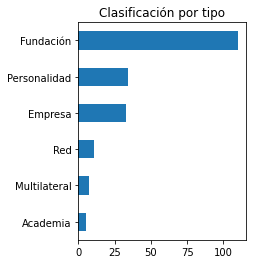

In [64]:
plot = data_actores['Tipo'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(figsize = (3,4), title = 'Clasificación por tipo')

In [42]:
data_actores['Red 1'].value_counts(dropna=False)

Unidos en Red            137
Padres e Hijos            38
Starlite                  16
La Fuerza del Corazón      9
Name: Red 1, dtype: int64

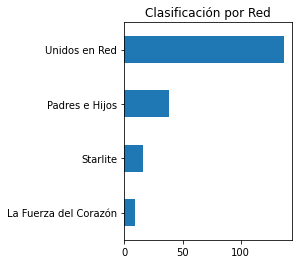

In [65]:
plot = data_actores['Red 1'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(figsize = (3,4), title = 'Clasificación por Red')

In [43]:
data_actores['Status'].value_counts(dropna=False)

Activa      163
Inactiva     37
Name: Status, dtype: int64

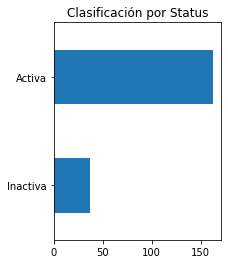

In [66]:
plot = data_actores['Status'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(figsize = (3,4), title = 'Clasificación por Status')

In [44]:
data_actores['Área Social'].value_counts(dropna=False)

Educación                                                                   34
Salud                                                                       26
Emprendimiento Social                                                       21
NaN                                                                         17
Niños y Jóvenes                                                             16
Tecnología                                                                  14
Comunicación                                                                13
Cultura                                                                     10
Deportes                                                                     9
Paz                                                                          7
Desarrollo Económico                                                         4
Calidad de Vida                                                              4
Medio Ambiente                                      

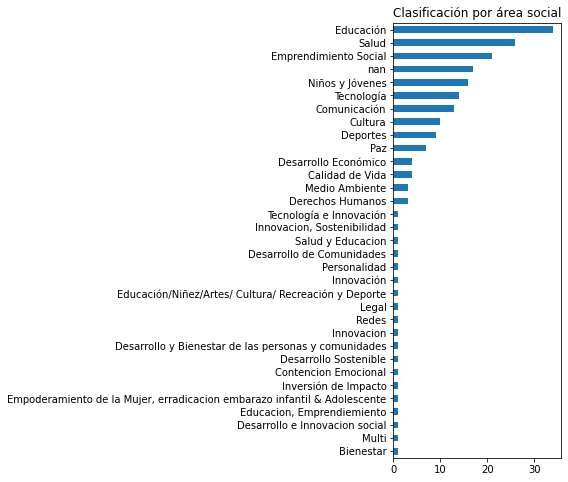

In [67]:
plot = data_actores['Área Social'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(figsize = (3,8), title = 'Clasificación por área social')

In [45]:
data_actores['ODS'].value_counts(dropna=False)

4.0     39
NaN     36
3.0     28
1.0     27
17.0    21
9.0     15
11.0    11
8.0      6
13.0     5
10.0     4
16.0     3
5.0      1
7.0      1
6.0      1
12.0     1
2.0      1
Name: ODS, dtype: int64

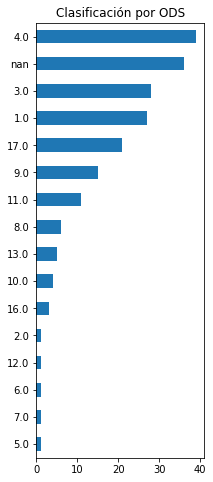

In [68]:
plot = data_actores['ODS'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(figsize = (3,8), title = 'Clasificación por ODS')

In [46]:
data_actores['Beneficiarios'].value_counts(dropna=False)

mixto            115
NaN               36
niños y niñas     27
jovenes            9
mujeres            8
migrantes          5
Name: Beneficiarios, dtype: int64

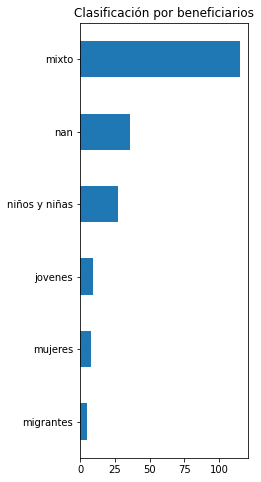

In [69]:
plot = data_actores['Beneficiarios'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(figsize = (3,8), title = 'Clasificación por beneficiarios')

In [48]:
data_actores['Pais'].value_counts(dropna=False)

NaN                     125
ESPAÑA                   12
COLOMBIA                  9
PERU                      8
VENEZUELA                 8
CHILE                     8
PANAMA                    5
ARGENTINA                 5
MEXICO                    4
ESTADOS UNIDOS            4
REPUBLICA DOMINICANA      4
BRASIL                    3
EL SALVADOR               2
PARAGUAY                  1
BOLIVIA                   1
PUERTO RICO               1
Name: Pais, dtype: int64

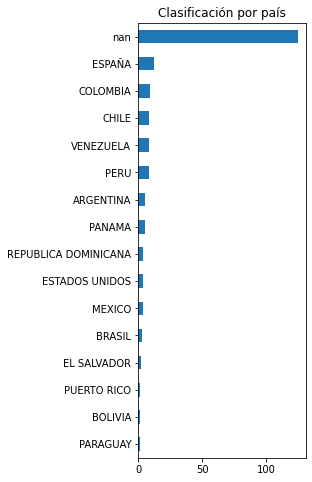

In [70]:
plot = data_actores['Pais'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(figsize = (3,8), title = 'Clasificación por país')